In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import matplotlib.dates as mdates

In [18]:
# 设置matplotlib的字体
plt.rcParams['font.family'] = ['WenQuanyi Zen Hei']

In [19]:
# 获取BTC和ETH兑美元的价格数据的函数
def get_crypto_price(symbol, currency, limit):
    url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={symbol}&tsym={currency}&limit={limit}"
    response = requests.get(url)
    data = response.json()['Data']['Data']
    df = pd.DataFrame(data)
    # 转换时间戳到真实日期
    df['time'] = pd.to_datetime(df['time'], unit='s')
    return df

In [20]:
# 获取最近30天的BTC和ETH数据
btc_data = get_crypto_price('BTC', 'USD', 29)
eth_data = get_crypto_price('ETH', 'USD', 29)

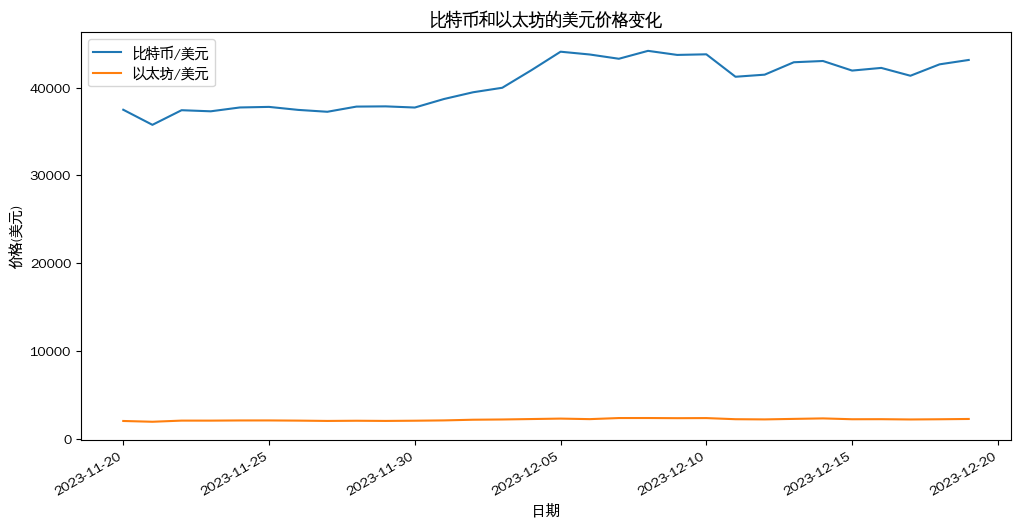

In [21]:
# 绘制图表
plt.figure(figsize=(12, 6))
plt.plot(btc_data['time'], btc_data['close'], label='比特币/美元')
plt.plot(eth_data['time'], eth_data['close'], label='以太坊/美元')
# 设置图的标题和图例
plt.title("比特币和以太坊的美元价格变化")
plt.xlabel("日期")
plt.ylabel("价格(美元)")

# plt.plot(btc_data['time'], btc_data['close'], label='BTC/USD')
# plt.plot(eth_data['time'], eth_data['close'], label='ETH/USD')
# plt.title("BTC and ETH Price in USD")
# plt.xlabel("Date")
# plt.ylabel("Price in USD")
plt.legend()

# 格式化x轴的日期显示
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # 每5天显示一次日期
plt.gcf().autofmt_xdate()  # 自动旋转日期标记